**<font size="4">5. Do students from certain geographic areas (Northeast) perform better academically than another geographic area (Southwest)?</font>**

For this question, we will split the data into domestic students and international students.<br>
For **domestic** students, we will focus on the column **Student Home Admission Publication Region**. Group the students by their home admission regions and class years, compare their **latest cumulative GPA**.<br>
For **international** students, we will focus on the column **Student World Region of Citizenship**. Group the students by their nationalities and class years, compare their **latest cumulative GPA**.

**<font size="4">5.1 Number of students based on geographic areas</font>**

In [1]:
#Step 1: Load the data (domestic vs. international students)
#For reference on how the data is separated, please see "[BU Athletics] General Data Cleaning"
import pandas as pd
domestic = pd.read_csv('Domestic_student_data.csv')
international = pd.read_csv('International_student_data.csv')

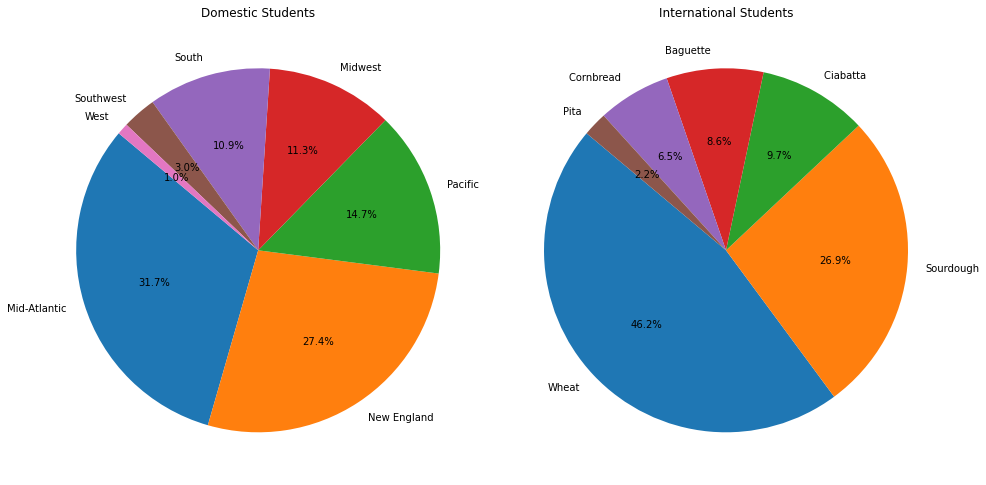

In [2]:
#Step 2: Group data for domestic and international students
import matplotlib.pyplot as plt

#Domestic: Group by 'Student Home Admission Publication Region'
domestic = domestic[domestic['Student Home Admission Publication Region'] != 'Unknown']
domestic_region_counts = domestic['Student Home Admission Publication Region'].value_counts()

#International: Group by 'Student World Region of Citizenship'
international_region_counts = international['Student World Region of Citizenship'].value_counts()

#Plot pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#Domestic students by Home Admission Regions
ax1.pie(domestic_region_counts, labels=domestic_region_counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Domestic Students')

#International Students by Citizenships
ax2.pie(international_region_counts, labels=international_region_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('International Students')

plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Remove unknown regions for domestic
domestic = domestic[domestic['Student Home Admission Publication Region'] != 'Unknown']

# Count occurrences for each region and calculate percentages
domestic_region_counts = domestic['Student Home Admission Publication Region'].value_counts()
domestic_total = domestic_region_counts.sum()
domestic_table = pd.DataFrame({
    'Region': domestic_region_counts.index,
    'Number of Students': domestic_region_counts.values,
    'Percentage': (domestic_region_counts / domestic_total * 100).round(1)
})

international_region_counts = international['Student World Region of Citizenship'].value_counts()
international_total = international_region_counts.sum()
international_table = pd.DataFrame({
    'Citizenship Region': international_region_counts.index,
    'Number of Students': international_region_counts.values,
    'Percentage': (international_region_counts / international_total * 100).round(1)
})

domestic_table

,Region,Number of Students,Percentage
Mid-Atlantic,Mid-Atlantic,157,31.7
New England,New England,136,27.4
Pacific,Pacific,73,14.7
Midwest,Midwest,56,11.3
South,South,54,10.9
Southwest,Southwest,15,3.0
West,West,5,1.0


In [4]:
international_table

,Citizenship Region,Number of Students,Percentage
Wheat,Wheat,43,46.2
Sourdough,Sourdough,25,26.9
Ciabatta,Ciabatta,9,9.7
Baguette,Baguette,8,8.6
Cornbread,Cornbread,6,6.5
Pita,Pita,2,2.2


**<font size="4">5.2 Domestic students: GPA distribution based on school years and regions</font>**

In [5]:
#Step 0: Define GPA categories
bins = [1.3, 1.7, 2.0, 2.3, 2.7, 3.0, 3.3, 3.7, 4.0, 4.1]
labels = ['D+ (1.3-1.7)', 'C- (1.7-2.0)', 'C (2.0-2.3)', 'C+ (2.3-2.7)',
          'B- (2.7-3.0)', 'B (3.0-3.3)', 'B+ (3.3-3.7)', 'A- (3.7-4.0)', 'A (4.0)']

#Step 1: Define the columns for cumulative GPA (latest current cumulative GPA based on class year)
cumulative_gpa_columns = [f'Semester {i} Cum GPA' for i in range(1, 13)]

#Step 2: Define a function to get the latest cumulative GPA (last non-null value in each row)
def get_latest_cum_gpa(row):
    for col in reversed(cumulative_gpa_columns):
        if pd.notna(row[col]):
            return row[col]
    return None

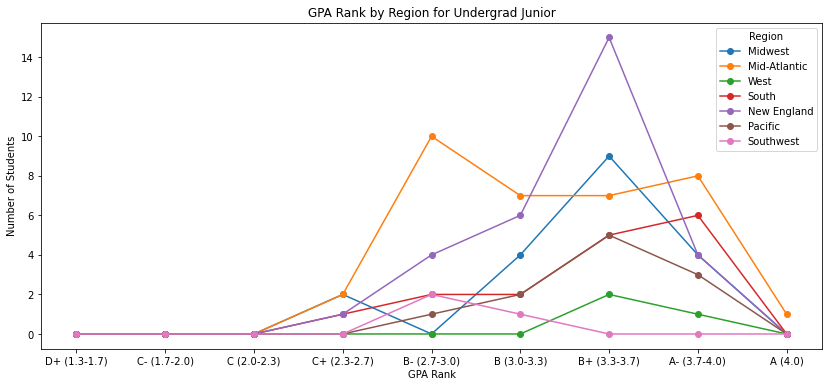

<Figure size 1440x720 with 0 Axes>

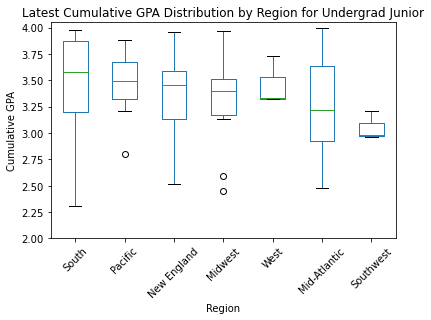

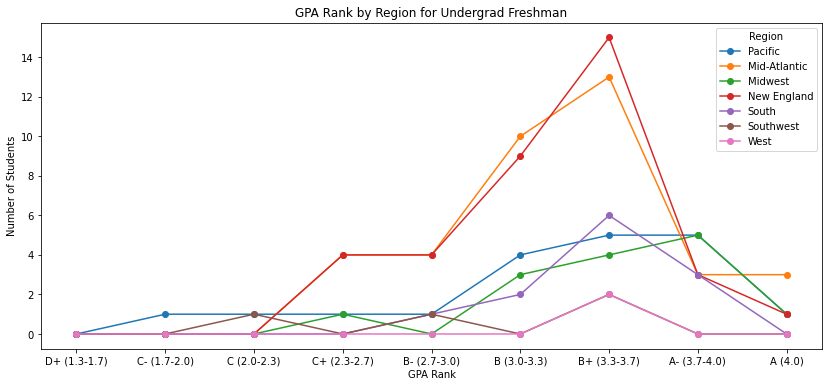

<Figure size 1440x720 with 0 Axes>

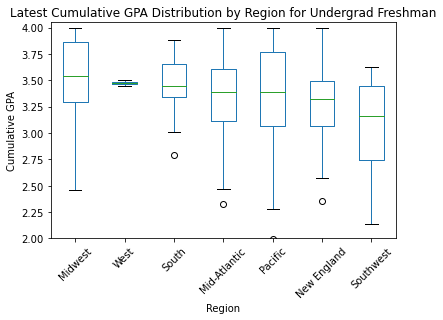

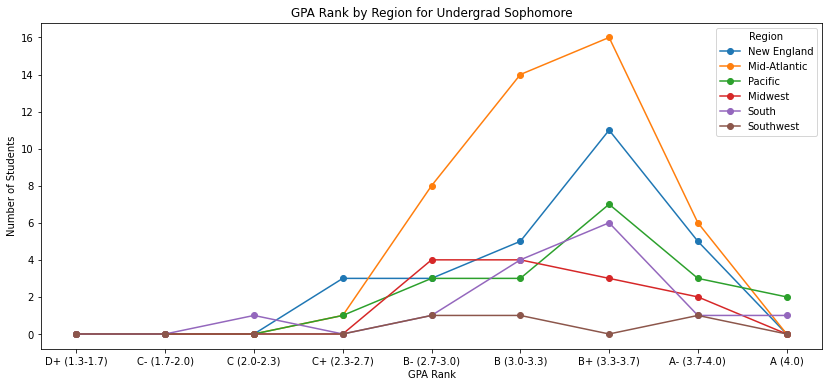

<Figure size 1440x720 with 0 Axes>

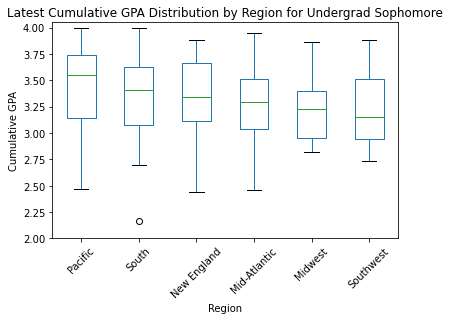

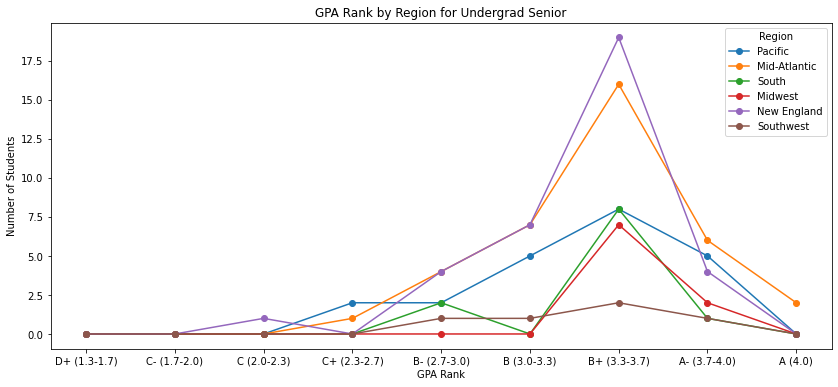

<Figure size 1440x720 with 0 Axes>

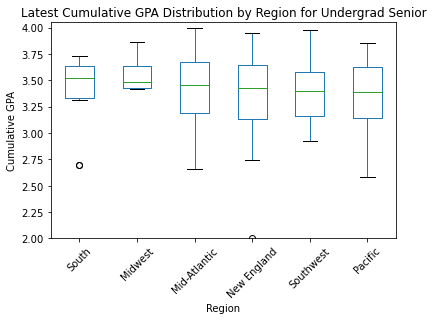

In [6]:
domestic = domestic[domestic['Student Home Admission Publication Region'] != 'Unknown']
#Step 3: Apply the function to get the latest GPA for each domestic students
domestic ['Latest Cum GPA'] = domestic.apply(get_latest_cum_gpa, axis=1)

#Step 4: Categorize the latest GPA using defined bins and labels
domestic['GPA Rank'] = pd.cut(domestic['Latest Cum GPA'], bins=bins, labels=labels, include_lowest=True, right=False)

#Step 5: Group by region and school year
grouped_data_domestic = domestic.groupby(['Student Home Admission Publication Region', 'Class Year Category'])

#Step 6: Plot the graph
#Setup for each school year
school_years = domestic['Class Year Category'].unique()

for year in school_years:
    #Filter data for the specific school year
    data_by_year = domestic[domestic['Class Year Category'] == year]
    
    #Line Plot
    plt.figure(figsize=(14, 6))
    #Iterate through each region to get GPA rank counts
    for region in data_by_year['Student Home Admission Publication Region'].unique():
        region_data = data_by_year[data_by_year['Student Home Admission Publication Region'] == region]
        gpa_rank_counts = region_data['GPA Rank'].value_counts().sort_index()
        plt.plot(gpa_rank_counts.index, gpa_rank_counts.values, marker='o', label=region)
        
    plt.title(f'GPA Rank by Region for {year}')
    plt.xlabel('GPA Rank')
    plt.ylabel('Number of Students')
    plt.legend(title='Region')
    plt.show()
    
    # Box Plot for Latest Cumulative GPA, sorted by median GPA
    plt.figure(figsize=(20, 10))
    
    # Calculate median GPA for sorting
    median_gpa_by_region = data_by_year.groupby('Student Home Admission Publication Region')['Latest Cum GPA'].median()
    sorted_regions = median_gpa_by_region.sort_values(ascending=False).index.tolist()
    
    # Filter and sort data for plotting
    sorted_data_by_year = data_by_year.set_index('Student Home Admission Publication Region').loc[sorted_regions].reset_index()

    # Create box plot with sorted regions
    sorted_data_by_year['Student Home Admission Publication Region'] = pd.Categorical(
        sorted_data_by_year['Student Home Admission Publication Region'], categories=sorted_regions, ordered=True
    )
    
    # Plot box plot with regions in sorted order
    sorted_data_by_year.sort_values(by='Student Home Admission Publication Region', inplace=True)
    box_plot = sorted_data_by_year.boxplot(column='Latest Cum GPA', by='Student Home Admission Publication Region', grid=False)
    
    # Set consistent y-axis limits
    box_plot.set_ylim(2.00, 4.05)
    plt.title(f'Latest Cumulative GPA Distribution by Region for {year}')
    plt.suptitle('')  # Removes the automatic 'Boxplot grouped by' title
    plt.xlabel('Region')
    plt.ylabel('Cumulative GPA')
    plt.xticks(rotation=45)
    plt.show()

**<font size="3">5.2.1 Statistics</font>**

In [7]:
#Initialize an empty dict
school_year_tables = {}

# Group data by school year and region to compute descriptive statistics for cumulative GPA
for year in domestic['Class Year Category'].unique():
    # Filter data for the specific school year
    year_data = domestic[domestic['Class Year Category'] == year]
    
    # Calculate statistics for each region within the school year
    stats_data = []
    for region, group in year_data.groupby('Student Home Admission Publication Region'):
        stats = group['Latest Cum GPA'].describe(percentiles=[0.25, 0.5, 0.75])
        stats_data.append({
            'Region': region,
            'Min GPA': stats['min'],
            'Q1 (25%)': stats['25%'],
            'Median (Q2, 50%)': stats['50%'],
            'Q3 (75%)': stats['75%'],
            'Max GPA': stats['max']
        })
    
    # Create a DataFrame for the current school year
    school_year_tables[year] = pd.DataFrame(stats_data)

print('Undergrad Freshman')
school_year_tables['Undergrad Freshman']

Undergrad Freshman


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Mid-Atlantic,2.33,3.1100,3.390,3.6100,4.00
1,Midwest,2.46,3.2950,3.545,3.8650,4.00
2,New England,2.35,3.0625,3.325,3.4925,4.00
3,Pacific,1.99,3.0650,3.390,3.7650,4.00
4,South,2.79,3.3450,3.445,3.6500,3.88
5,Southwest,2.14,2.7400,3.165,3.4500,3.63
6,West,3.45,3.4625,3.475,3.4875,3.50


In [8]:
print('Undergrad Sophomore')
school_year_tables['Undergrad Sophomore']

Undergrad Sophomore


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Mid-Atlantic,2.46,3.0400,3.29,3.5100,3.95
1,Midwest,2.82,2.9500,3.23,3.4000,3.86
2,New England,2.44,3.1100,3.34,3.6600,3.88
3,Pacific,2.47,3.1450,3.55,3.7400,4.00
4,South,2.16,3.0725,3.41,3.6275,4.00
5,Southwest,2.73,2.9400,3.15,3.5150,3.88


In [9]:
print('Undergrad Junior')
school_year_tables['Undergrad Junior']

Undergrad Junior


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Mid-Atlantic,2.48,2.9200,3.220,3.6350,4.00
1,Midwest,2.45,3.1750,3.400,3.5150,3.97
2,New England,2.52,3.1325,3.455,3.5900,3.96
3,Pacific,2.80,3.3250,3.490,3.6700,3.88
4,South,2.31,3.1975,3.575,3.8725,3.98
5,Southwest,2.96,2.9700,2.980,3.0950,3.21
6,West,3.32,3.3250,3.330,3.5300,3.73


In [10]:
print('Undergrad Senior')
school_year_tables['Undergrad Senior']

Undergrad Senior


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Mid-Atlantic,2.66,3.190,3.455,3.675,4.00
1,Midwest,3.42,3.430,3.480,3.640,3.86
2,New England,2.00,3.130,3.430,3.645,3.95
3,Pacific,2.58,3.145,3.390,3.625,3.85
4,South,2.70,3.330,3.520,3.635,3.73
5,Southwest,2.92,3.160,3.400,3.580,3.98


**<font size="4">5.3 International students: GPA distribution based on school years and regions</font>**

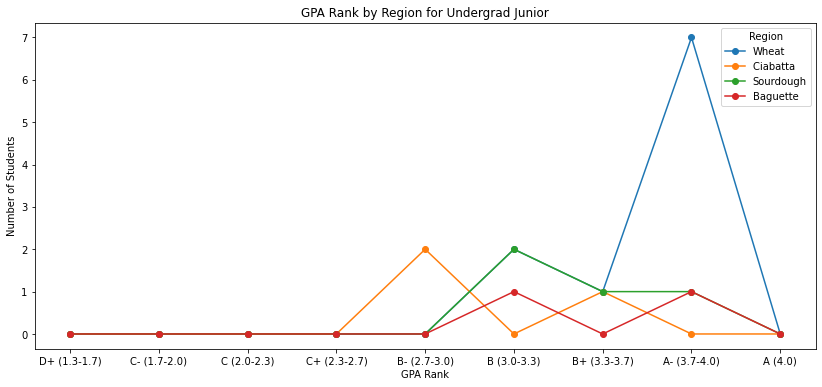

<Figure size 1440x720 with 0 Axes>

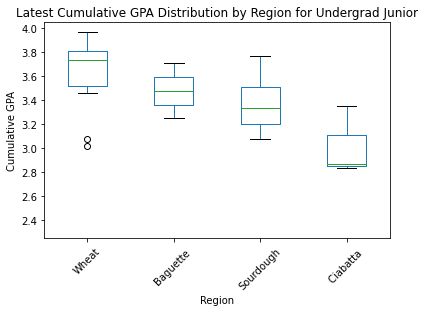

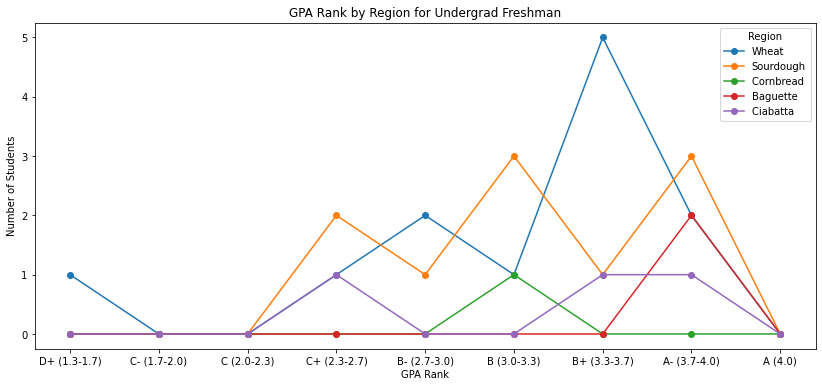

<Figure size 1440x720 with 0 Axes>

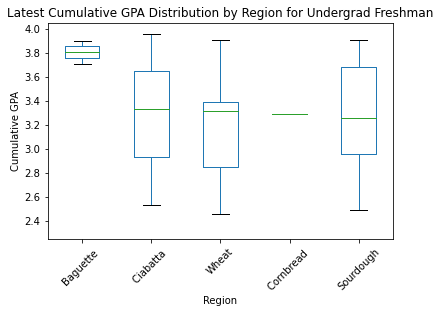

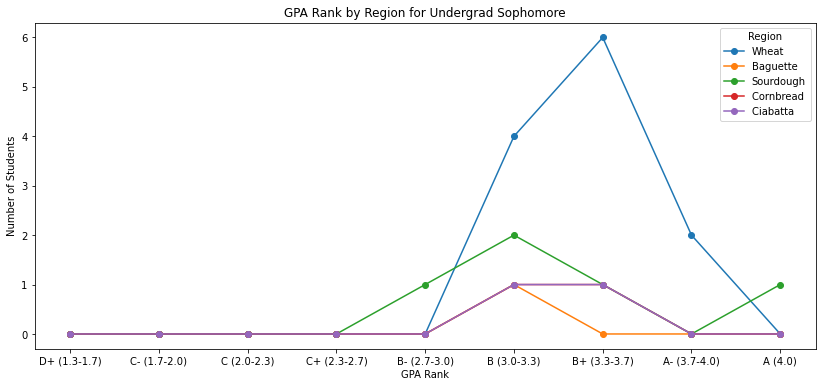

<Figure size 1440x720 with 0 Axes>

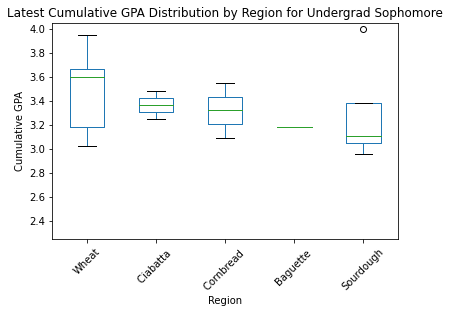

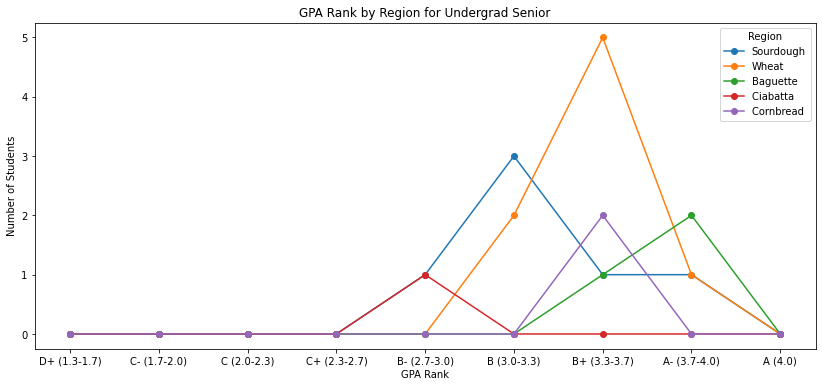

<Figure size 1440x720 with 0 Axes>

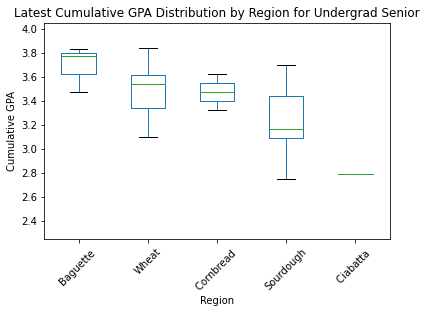

In [21]:
#Step 3: Apply the function to get the latest GPA for each international students
international ['Latest Cum GPA'] = international.apply(get_latest_cum_gpa, axis=1)

#Step 4: Categorize the latest GPA using defined bins and labels
international['GPA Rank'] = pd.cut(international['Latest Cum GPA'], bins=bins, labels=labels, include_lowest=True, right=False)

#Step 5: Group by region and school year
grouped_data_international = international.groupby(['Student World Region of Citizenship', 'Class Year Category'])

#Step 6: Plot the graph
# Define regions to exclude by class year
exclusions = {
    'Undergrad Freshman': ['Cornbread', 'Pita'],
    'Undergrad Sophomore': ['Pita', 'Baguette'],
    'Undergrad Senior': ['Ciabatta']
}

#Setup for each school year
school_years = international['Class Year Category'].unique()

for year in school_years:
    # Filter data for the specific school year
    data_by_year = international[international['Class Year Category'] == year]
    
    # Exclude specific regions based on class year
    if year in exclusions:
        for region in exclusions[year]:
            data_by_year = data_by_year[data_by_year['Student World Region of Citizenship'] != region]
    
    # Line Plot for GPA Rank Distribution
    plt.figure(figsize=(14, 6))
    for region in data_by_year['Student World Region of Citizenship'].unique():
        region_data = data_by_year[data_by_year['Student World Region of Citizenship'] == region]
        gpa_rank_counts = region_data['GPA Rank'].value_counts().sort_index()
        plt.plot(gpa_rank_counts.index, gpa_rank_counts.values, marker='o', label=region)
        
    plt.title(f'GPA Rank by Region for {year}')
    plt.xlabel('GPA Rank')
    plt.ylabel('Number of Students')
    plt.legend(title='Region')
    plt.show()
    
    # Box Plot for Latest Cumulative GPA, sorted by median GPA
    plt.figure(figsize=(20, 10))
    
    # Calculate median GPA for sorting
    median_gpa_by_region = data_by_year.groupby('Student World Region of Citizenship')['Latest Cum GPA'].median()
    sorted_regions = median_gpa_by_region.sort_values(ascending=False).index.tolist()
    
    # Filter and sort data for plotting
    sorted_data_by_year = data_by_year.set_index('Student World Region of Citizenship').loc[sorted_regions].reset_index()

    # Create box plot with sorted regions
    sorted_data_by_year['Student World Region of Citizenship'] = pd.Categorical(
        sorted_data_by_year['Student World Region of Citizenship'], categories=sorted_regions, ordered=True
    )
    
    # Plot box plot with regions in sorted order
    sorted_data_by_year.sort_values(by='Student World Region of Citizenship', inplace=True)
    box_plot = sorted_data_by_year.boxplot(column='Latest Cum GPA', by='Student World Region of Citizenship', grid=False)
    
    box_plot.set_ylim(2.25, 4.05)
    plt.title(f'Latest Cumulative GPA Distribution by Region for {year}')
    plt.suptitle('')  # Removes the automatic 'Boxplot grouped by' title
    plt.xlabel('Region')
    plt.ylabel('Cumulative GPA')
    plt.xticks(rotation=45)
    plt.show()

**<font size="3">5.3.1 Statistics</font>**

In [27]:
#Initialize an empty dict
school_year_tables = {}

# Group data by school year and region to compute descriptive statistics for cumulative GPA
for year in international['Class Year Category'].unique():
    # Filter data for the specific school year
    year_data = international[international['Class Year Category'] == year]
    
    # Calculate statistics for each region within the school year
    stats_data = []
    for region, group in year_data.groupby('Student World Region of Citizenship'):
        stats = group['Latest Cum GPA'].describe(percentiles=[0.25, 0.5, 0.75])
        stats_data.append({
            'Region': region,
            'Min GPA': stats['min'],
            'Q1 (25%)': stats['25%'],
            'Median (Q2, 50%)': stats['50%'],
            'Q3 (75%)': stats['75%'],
            'Max GPA': stats['max']
        })
    
    # Create a DataFrame for the current school year
    school_year_tables[year] = pd.DataFrame(stats_data)

print('Undergrad Freshman')
school_year_tables['Undergrad Freshman']

Undergrad Freshman


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Baguette,3.71,3.7575,3.805,3.8525,3.90
1,Ciabatta,2.53,2.9300,3.330,3.6450,3.96
2,Cornbread,3.29,3.2900,3.290,3.2900,3.29
3,Pita,3.48,3.4800,3.480,3.4800,3.48
4,Sourdough,2.49,2.9550,3.260,3.6800,3.91
5,Wheat,1.33,2.8450,3.315,3.3875,3.91


In [28]:
print('Undergrad Sophomore')
school_year_tables['Undergrad Sophomore']

Undergrad Sophomore


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Baguette,3.18,3.1800,3.180,3.1800,3.18
1,Ciabatta,3.25,3.3075,3.365,3.4225,3.48
2,Cornbread,3.09,3.2050,3.320,3.4350,3.55
3,Pita,NaN,NaN,NaN,NaN,NaN
4,Sourdough,2.96,3.0500,3.110,3.3800,4.00
5,Wheat,3.02,3.1850,3.600,3.6625,3.95


In [29]:
print('Undergrad Junior')
school_year_tables['Undergrad Junior']

Undergrad Junior


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Baguette,3.25,3.365,3.480,3.595,3.71
1,Ciabatta,2.84,2.855,2.870,3.110,3.35
2,Sourdough,3.08,3.200,3.335,3.515,3.77
3,Wheat,3.02,3.520,3.740,3.810,3.97


In [30]:
print('Undergrad Senior')
school_year_tables['Undergrad Senior']

Undergrad Senior


,Region,Min GPA,Q1 (25%),"Median (Q2, 50%)",Q3 (75%),Max GPA
0,Baguette,3.47,3.6200,3.770,3.8000,3.83
1,Ciabatta,2.79,2.7900,2.790,2.7900,2.79
2,Cornbread,3.32,3.3950,3.470,3.5450,3.62
3,Sourdough,2.75,3.0875,3.165,3.4375,3.70
4,Wheat,3.10,3.3375,3.540,3.6150,3.84


**<font size="4">5.4 Additional Exploration</font>**

For this section, we will explore if **geographic differences** and **High School GPA** has any impact on student athletes' academic performance. The following line graph shows the median GPA from High School to Senior for each geographic region.

**<font size="3">5.4.1 Domestic Students</font>**

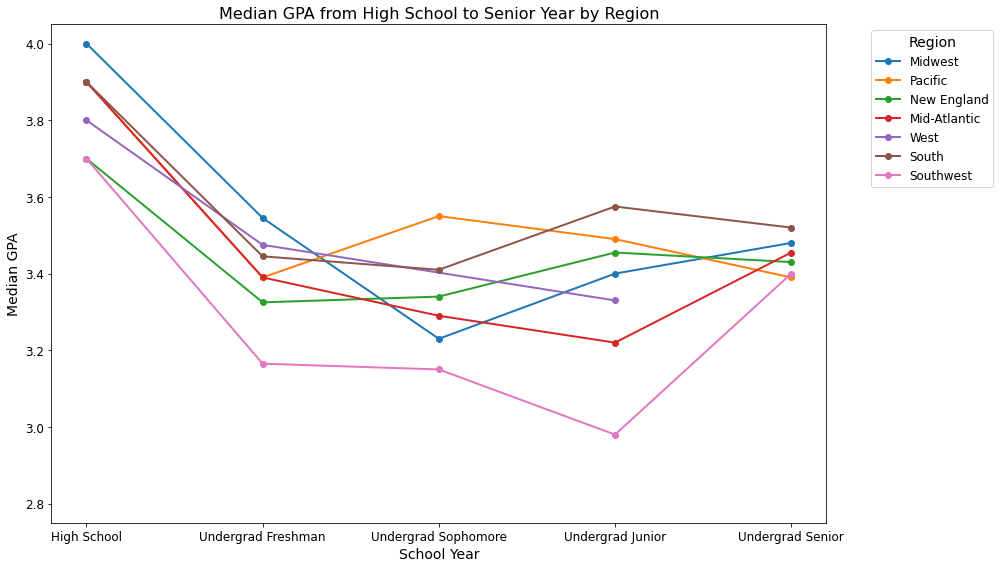

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Cap High School GPA at 4.0
domestic['Average Undergraduate Applicant High School GPA'] = domestic['Average Undergraduate Applicant High School GPA'].clip(upper=4.0)

# Step 2: Initialize data for plotting
regions = domestic['Student Home Admission Publication Region'].unique()
school_year_order = ['High School', 'Undergrad Freshman', 'Undergrad Sophomore', 'Undergrad Junior', 'Undergrad Senior']

# Step 3: Prepare the line graph data
plt.figure(figsize=(14, 8))

for region in regions:
    # Filter data for the region
    region_data = domestic[domestic['Student Home Admission Publication Region'] == region]
    
    # Calculate the median High School GPA
    hs_median = region_data['Average Undergraduate Applicant High School GPA'].median()
    
    # Calculate the median College GPA for each class year
    college_gpa_median = region_data.groupby('Class Year Category')['Latest Cum GPA'].median()
    
    # Combine HS GPA and college GPA into a single list in the correct order
    median_gpa_values = [hs_median] + [
        college_gpa_median.get(year, None) for year in school_year_order[1:]
    ]
    
    # Filter out None values (in case some categories are missing)
    valid_years = [year for year, value in zip(school_year_order, median_gpa_values) if value is not None]
    valid_gpa_values = [value for value in median_gpa_values if value is not None]
    
    # Plot the line graph for the region
    plt.plot(valid_years, valid_gpa_values, marker='o', label=region, linewidth=2)

# Step 4: Customize and show the plot
plt.title('Median GPA from High School to Senior Year by Region', fontsize=16)
plt.xlabel('School Year', fontsize=14)
plt.ylabel('Median GPA', fontsize=14)
plt.ylim(2.75, 4.05)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**<font size="3">5.4.1.1 Calculate p-value for Domestic Students</font>**

This section will calculate the p-value and statistically evaluate the relationship between geographic regions, high school GPA, and college performance. <br><br>
**Hypothesis**<br>
**Null Hypothesis:** There is **no signficant** difference in college GPA across regions, controlling for high school GPA.<br>
**Alternative Hypothesis:** There is a **significant** difference in college GPA across regions, even when accounting for high school GPA.<br><br>
We will be using ANCOVA to test if the region significantly affects college GPA while accounting for high school GPA.

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

#Step 1: Data preparation
data = domestic[['Student Home Admission Publication Region', 
                 'Average Undergraduate Applicant High School GPA',
                'Latest Cum GPA']].dropna()

#Step 2: Fit the ANCOVA model
#'Latest Cum GPA' as the dependent variable
#'Student Home Admission Publication Region' as the covariate
#'Average Undergraduate Applicant High School GPA' as the independent variable
model = ols('Q("Latest Cum GPA") ~ Q("Average Undergraduate Applicant High School GPA") + C(Q("Student Home Admission Publication Region"))', data=data).fit()

#Step 3: Perform ANOVA on the model
anova_table = sm.stats.anova_lm(model, typ=2)

#Step 4: Print the results
print(anova_table)

                                                       sum_sq     df  \
C(Q("Student Home Admission Publication Region"))    0.746059    6.0   
Q("Average Undergraduate Applicant High School ...  10.811032    1.0   
Residual                                            62.442414  458.0   

                                                            F        PR(>F)  
C(Q("Student Home Admission Publication Region"))    0.912028  4.858877e-01  
Q("Average Undergraduate Applicant High School ...  79.296304  1.260900e-17  
Residual                                                  NaN           NaN  


**1. C(Q("Student Home Admission Publication Region"))**<br>
**Sum of Squares (sum_sq): 0.7461** (Amount of variance in the dependent variable (college GPA) that is explained by the geographic region after accounting for high school GPA.<br>
**p-value(PR(>F)): 0.486** This is the probability of observing an F-statistic as extreme as **0.912**, assumign the null hypothesis is true. Since the **p-value >> 0.05**, we **fail to rejest** the null hypothesis. This indicates that **region does not have a statistically significant effect on college GPA after accounting for high school GPA**.<br>
<br>
**2. Q("Average Undergraduate Applicant High School GPA")**<br>
**F-statistic (F): 79.2963** This high F-statistic indicates a **strong** relationship between high school GPA and college GPA.<br>
**p-value (PR(>F)): 1.260900e-17 (essentially 0)** Since the **p-value <<< 0.05**, this means that **high school GPA has a significant effect on college GPA.**

In [32]:
import statsmodels.formula.api as smf

#Step 5.1 Fit a model with interaction term
model_interaction = smf.ols(
    'Q("Latest Cum GPA") ~ Q("Average Undergraduate Applicant High School GPA") * C(Q("Student Home Admission Publication Region"))',
    data=data).fit()

#Step 5.2 Summarize the model
print(model_interaction.summary())

                             OLS Regression Results                            
Dep. Variable:     Q("Latest Cum GPA")   R-squared:                       0.195
Model:                             OLS   Adj. R-squared:                  0.172
Method:                  Least Squares   F-statistic:                     8.438
Date:                 Mon, 25 Nov 2024   Prob (F-statistic):           2.19e-15
Time:                         00:15:15   Log-Likelihood:                -182.82
No. Observations:                  466   AIC:                             393.6
Df Residuals:                      452   BIC:                             451.7
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

**<font size="3">5.4.2 Statistics (Domestic)</font>**

In [27]:
# Step 1: Prepare a DataFrame to store median GPA values
median_gpa_table = pd.DataFrame(columns=school_year_order)

# Step 2: Populate the table with median GPA values for each region
for region in regions:
    # Filter data for the region
    region_data = domestic[domestic['Student Home Admission Publication Region'] == region]
    
    # Calculate the median High School GPA
    hs_median = region_data['Average Undergraduate Applicant High School GPA'].median()
    
    # Calculate the median College GPA for each class year
    college_gpa_median = region_data.groupby('Class Year Category')['Latest Cum GPA'].median()
    
    # Combine HS GPA and college GPA into a single list in the correct order
    median_gpa_values = [hs_median] + [
        college_gpa_median.get(year, None) for year in school_year_order[1:]
    ]
    
    # Add the region and its median GPAs to the table
    median_gpa_table.loc[region] = median_gpa_values
    
# Step 3: Sort the table by High School GPA in descending order
median_gpa_table = median_gpa_table.sort_values(by='High School', ascending=False)
    
median_gpa_table

,High School,Undergrad Freshman,Undergrad Sophomore,Undergrad Junior,Undergrad Senior
Midwest,4.0,3.545,3.23,3.400,3.480
Pacific,3.9,3.390,3.55,3.490,3.390
Mid-Atlantic,3.9,3.390,3.29,3.220,3.455
South,3.9,3.445,3.41,3.575,3.520
West,3.8,3.475,NaN,3.330,NaN
New England,3.7,3.325,3.34,3.455,3.430
Southwest,3.7,3.165,3.15,2.980,3.400


**<font size="3">5.4.3 International Students</font>**

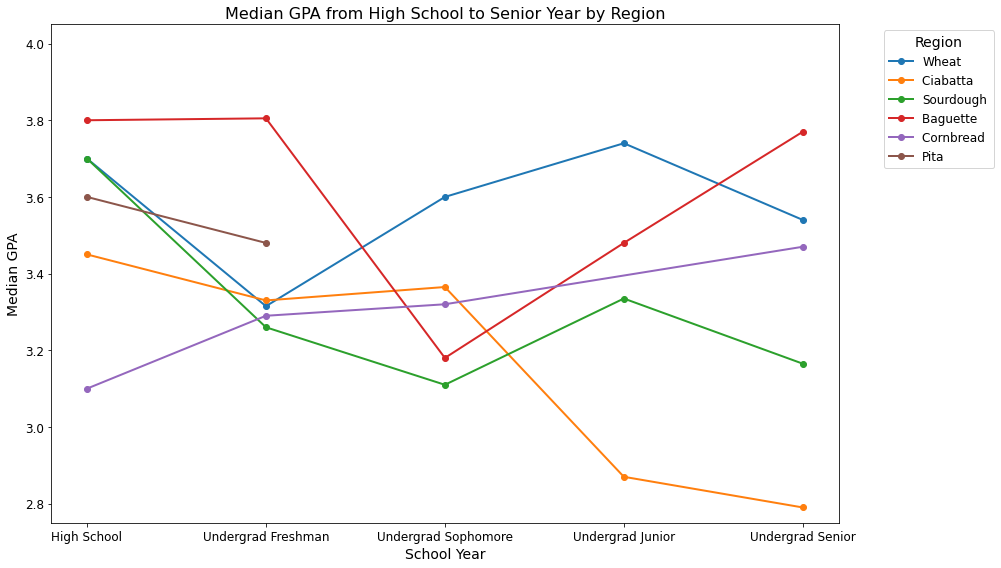

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Cap High School GPA at 4.0
international['Average Undergraduate Applicant High School GPA'] = international['Average Undergraduate Applicant High School GPA'].clip(upper=4.0)

# Step 2: Initialize data for plotting
regions = international['Student World Region of Citizenship'].unique()
school_year_order = ['High School', 'Undergrad Freshman', 'Undergrad Sophomore', 'Undergrad Junior', 'Undergrad Senior']

# Step 3: Prepare the line graph data
plt.figure(figsize=(14, 8))

for region in regions:
    # Filter data for the region
    region_data = international[international['Student World Region of Citizenship'] == region]
    
    # Calculate the median High School GPA
    hs_median = region_data['Average Undergraduate Applicant High School GPA'].median()
    
    # Calculate the median College GPA for each class year
    college_gpa_median = region_data.groupby('Class Year Category')['Latest Cum GPA'].median()
    
    # Combine HS GPA and college GPA into a single list in the correct order
    median_gpa_values = [hs_median] + [
        college_gpa_median.get(year, None) for year in school_year_order[1:]
    ]
    
    # Filter out None values (in case some categories are missing)
    valid_years = [year for year, value in zip(school_year_order, median_gpa_values) if value is not None]
    valid_gpa_values = [value for value in median_gpa_values if value is not None]
    
    # Plot the line graph for the region
    plt.plot(valid_years, valid_gpa_values, marker='o', label=region, linewidth=2)

# Step 4: Customize and show the plot
plt.title('Median GPA from High School to Senior Year by Region', fontsize=16)
plt.xlabel('School Year', fontsize=14)
plt.ylabel('Median GPA', fontsize=14)
plt.ylim(2.75, 4.05)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**<font size="3">5.4.4 Statistics (International)</font>**

In [29]:
# Step 1: Prepare a DataFrame to store median GPA values
median_gpa_table = pd.DataFrame(columns=school_year_order)

# Step 2: Populate the table with median GPA values for each region
for region in regions:
    # Filter data for the region
    region_data = international[international['Student World Region of Citizenship'] == region]
    
    # Calculate the median High School GPA
    hs_median = region_data['Average Undergraduate Applicant High School GPA'].median()
    
    # Calculate the median College GPA for each class year
    college_gpa_median = region_data.groupby('Class Year Category')['Latest Cum GPA'].median()
    
    # Combine HS GPA and college GPA into a single list in the correct order
    median_gpa_values = [hs_median] + [
        college_gpa_median.get(year, None) for year in school_year_order[1:]
    ]
    
    # Add the region and its median GPAs to the table
    median_gpa_table.loc[region] = median_gpa_values
    
# Step 3: Sort the table by High School GPA in descending order
median_gpa_table = median_gpa_table.sort_values(by='High School', ascending=False)
    
median_gpa_table

,High School,Undergrad Freshman,Undergrad Sophomore,Undergrad Junior,Undergrad Senior
Baguette,3.80,3.805,3.180,3.480,3.770
Wheat,3.70,3.315,3.600,3.740,3.540
Sourdough,3.70,3.260,3.110,3.335,3.165
Pita,3.60,3.480,NaN,NaN,NaN
Ciabatta,3.45,3.330,3.365,2.870,2.790
Cornbread,3.10,3.290,3.320,NaN,3.470
